# **Decision Trees**

**Generate synthetic data**

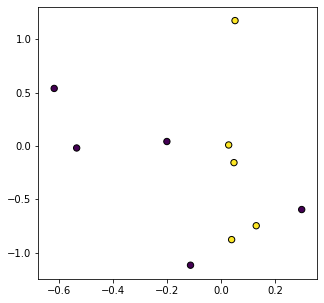

In [47]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error

X, y = make_classification(n_samples = 10,n_features=2, n_redundant=0, n_informative=1, class_sep=0.1,
                             n_clusters_per_class=1, random_state=2)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='k');

**make_classification**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

# Decision Tree Classification

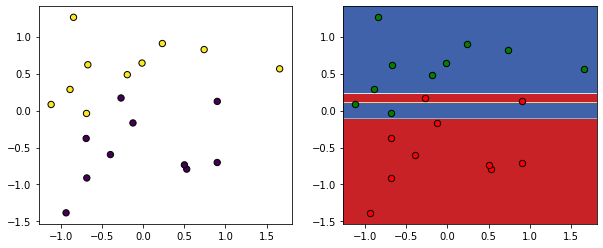

In [2]:
# Play with class_sep and observe the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples = 20, n_features=2, n_redundant=0, n_informative=1, class_sep=0.5,
                             n_clusters_per_class=1, random_state=1)

fig, ax = plt.subplots(1,2,figsize=(10,4));

ax[0].scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier().fit(X, y)
clf.fit(X, y)
plot_step = 0.02
n_classes = 2
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    ax[1].scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

**Draw Decision Tree**

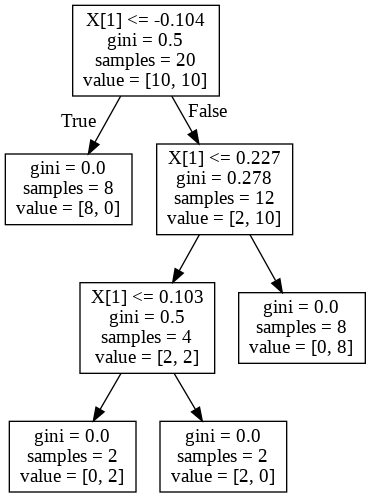

In [3]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Multiclass Classification**

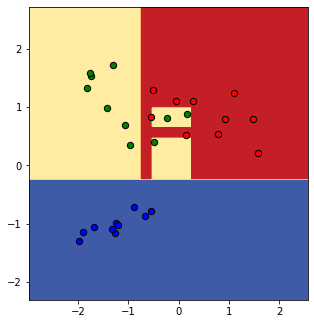

In [4]:
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.9,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

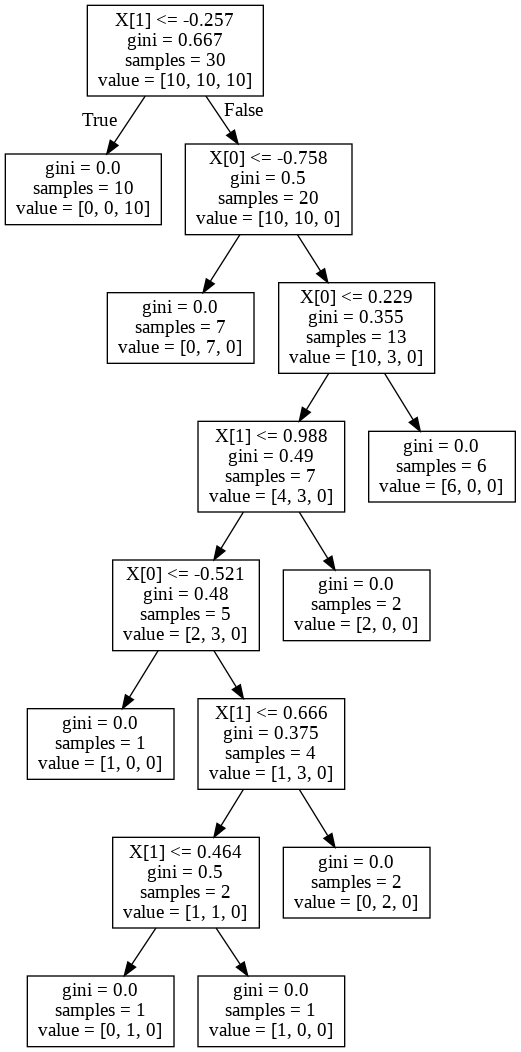

In [5]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# **Overfitting**

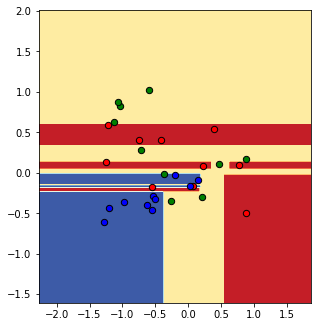

In [6]:
# Note that class_sep=0.2
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.2,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

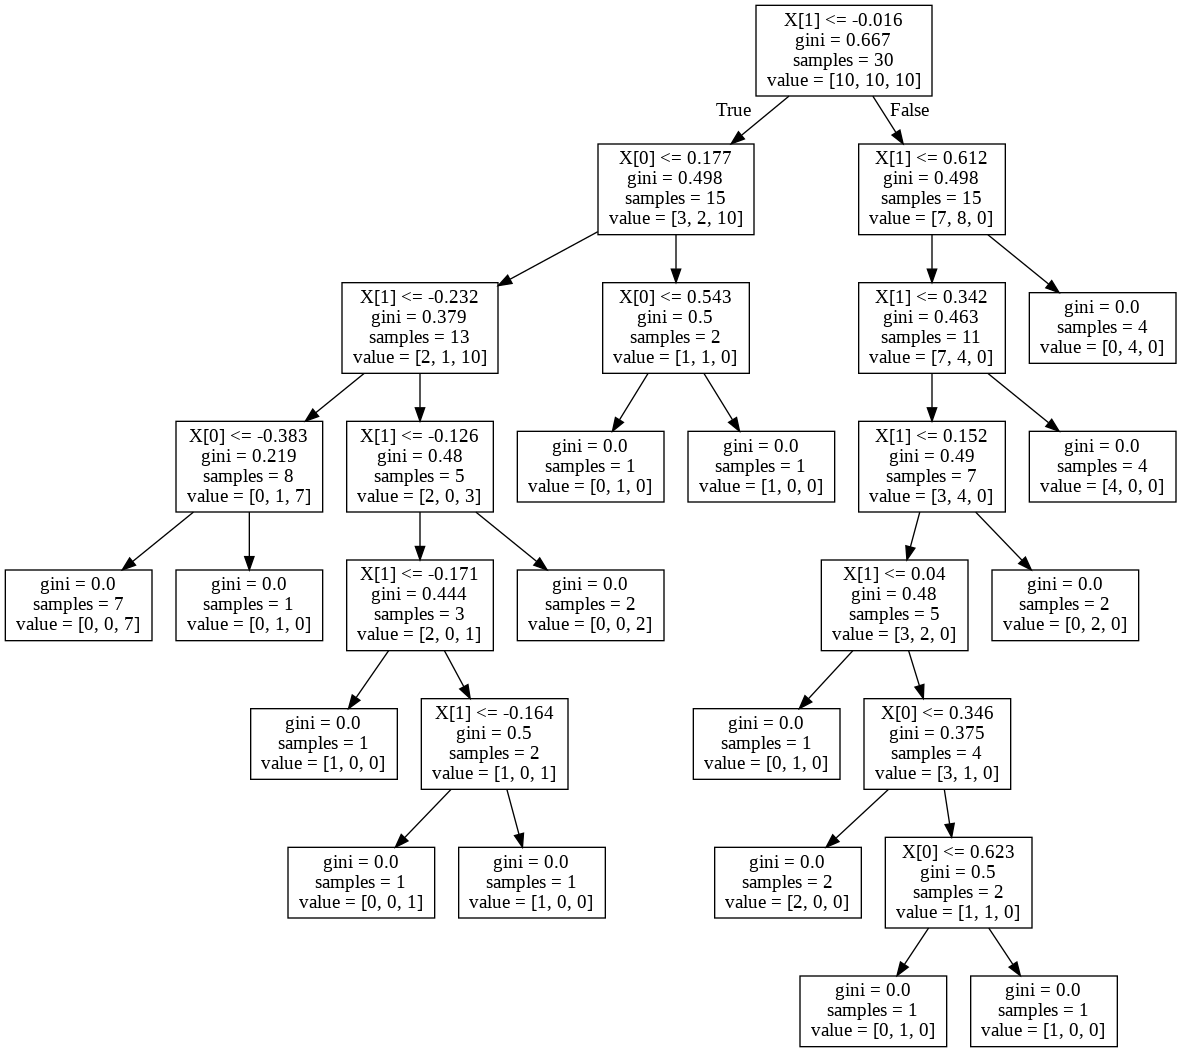

In [7]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Decision Tree min_samples_split**

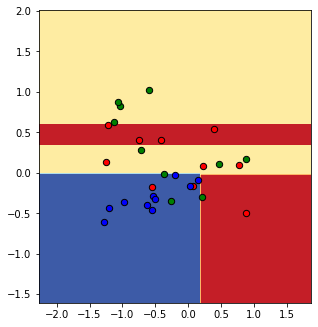

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier(min_samples_split=10)
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)


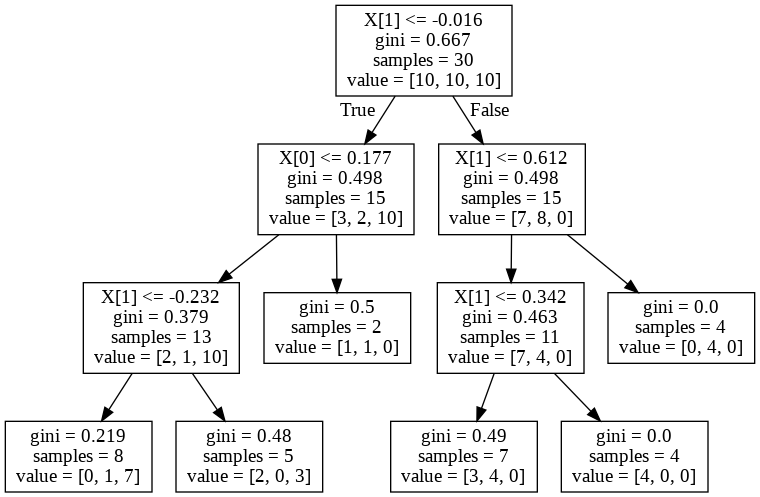

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Decision Tree Regression**
Decision trees can also be used for regression. Much of the algorithm is similar to building classification trees. The key difference is, the value which minimizes the following sum of squared error is chosen as the splitting point. In other words the split point is where the reduction in variance is maximum.

SSE=∑i∈R1(yi−y¯1)2+∑i∈R2(yi−y¯2)2

where y¯1 and y¯2 are the mean values in regions R1 and R2.

In [0]:
import pandas as pd

In [12]:
#Upload train data set file from local to colabs area
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [13]:
# Load Train dataset
train = pd.read_csv("train.csv")
train.head(5).append(train.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136

In [15]:
uploaded = files.upload()

Saving test.csv to test.csv


In [16]:
# Load Test dataset
test = pd.read_csv("test.csv")
test.head(5).append(test.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,

(12, 1) (12,)
(2, 1) (2,)


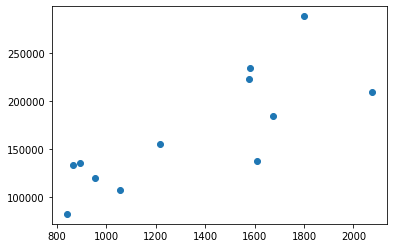

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train2 = train2.sample(frac=0.01)
X = train2[['GrLivArea']]
y = train2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

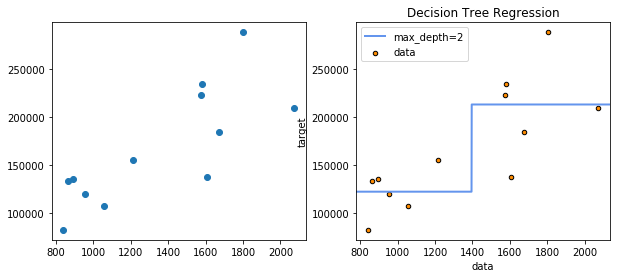

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth

regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 3000.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)


fig, ax = plt.subplots(1,2,figsize=(10,4));

# Plot the results
ax[0].scatter(X_train, y_train)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
ax[1].scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
ax[1].plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

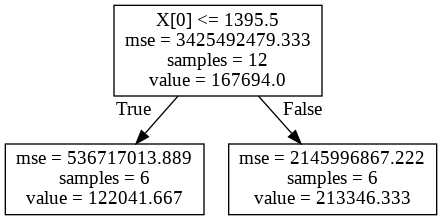

In [20]:
dot_data = tree.export_graphviz(regr_1, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Decision Tree vs. Linear Regression**

![alt text](https://nbviewer.jupyter.org/github/tevfikaytekin/data_science/blob/master/images/ubend.jpeg)

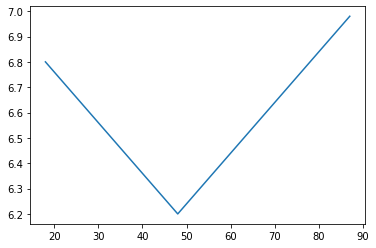

In [21]:
age = np.arange(18, 88)
h1 = np.arange(6.8, 6.2, -0.02)
h2 = np.arange(6.2, 7, 0.02)
h = h1.tolist()+h2.tolist()
plt.plot(age,h)

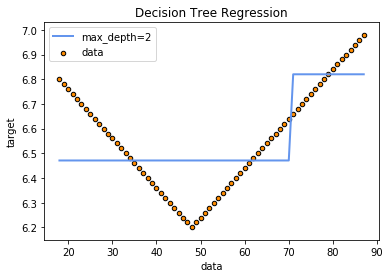

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression tree
regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth
age = age.reshape(age.size,1)
regr_1.fit(age, h)

# Predict
X_test = np.arange(18, 88.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

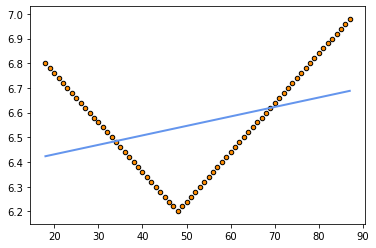

In [23]:
# fit a linear model
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(age, h)
y_1 = model.predict(X_test)
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)

You can play with the following data to better understand how split points are chosen in order to reduce variance.

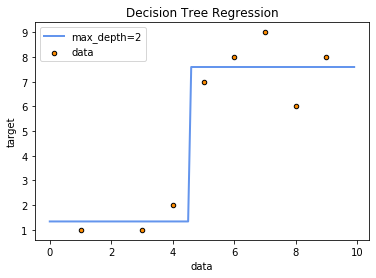

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X = np.array([1,2,3,4,5,6,7,8,9]);
X = X.reshape(-1,1)
y = [1,3,1,2,7,8,9,6,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth
regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0, 10, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Test MAE: 32193.559188963703
Test Kaggle-Score: 0.24880696918279974
Test MAPE: 20.44365225075775
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


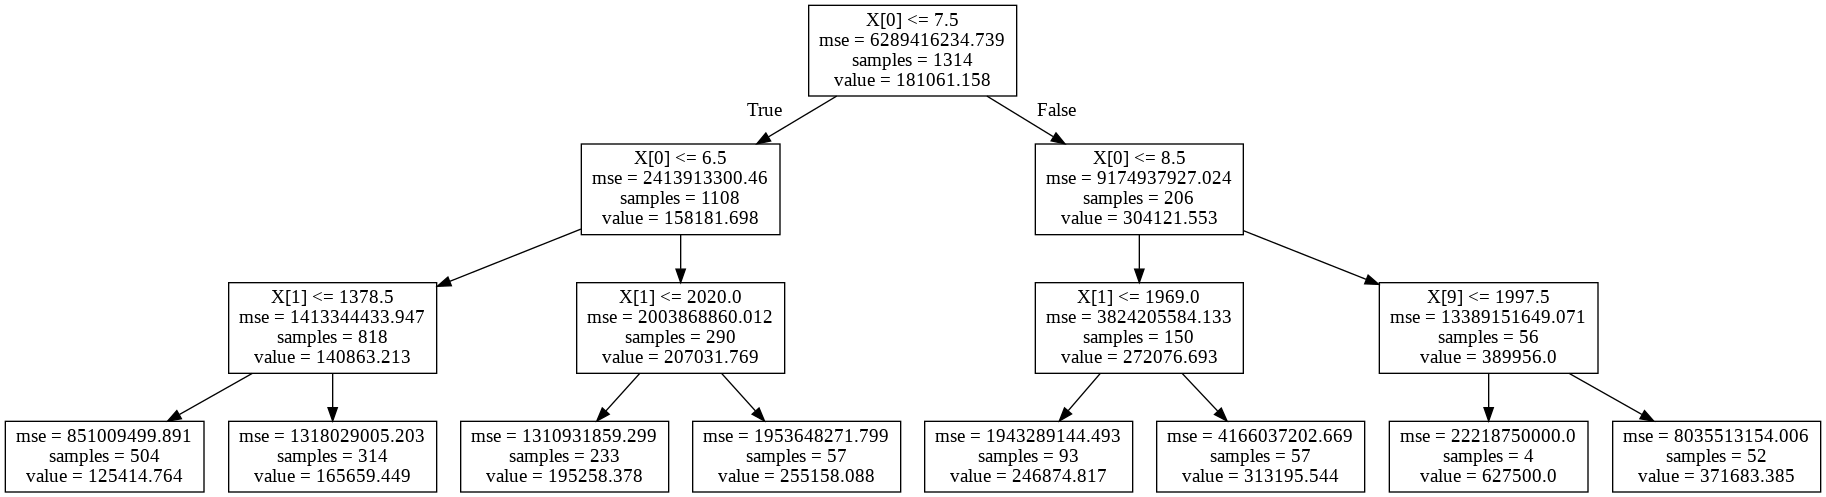

In [27]:
# Run Regression Tree with top correlated 10 attributes with SalePrice
from sklearn.metrics import mean_squared_log_error
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())


    regr = DecisionTreeRegressor(max_depth=3)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

print(top10)

dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Test MAE: 31388.887269907675
Test Kaggle-Score: 0.23546160239460295
Test MAPE: 19.116861595567705


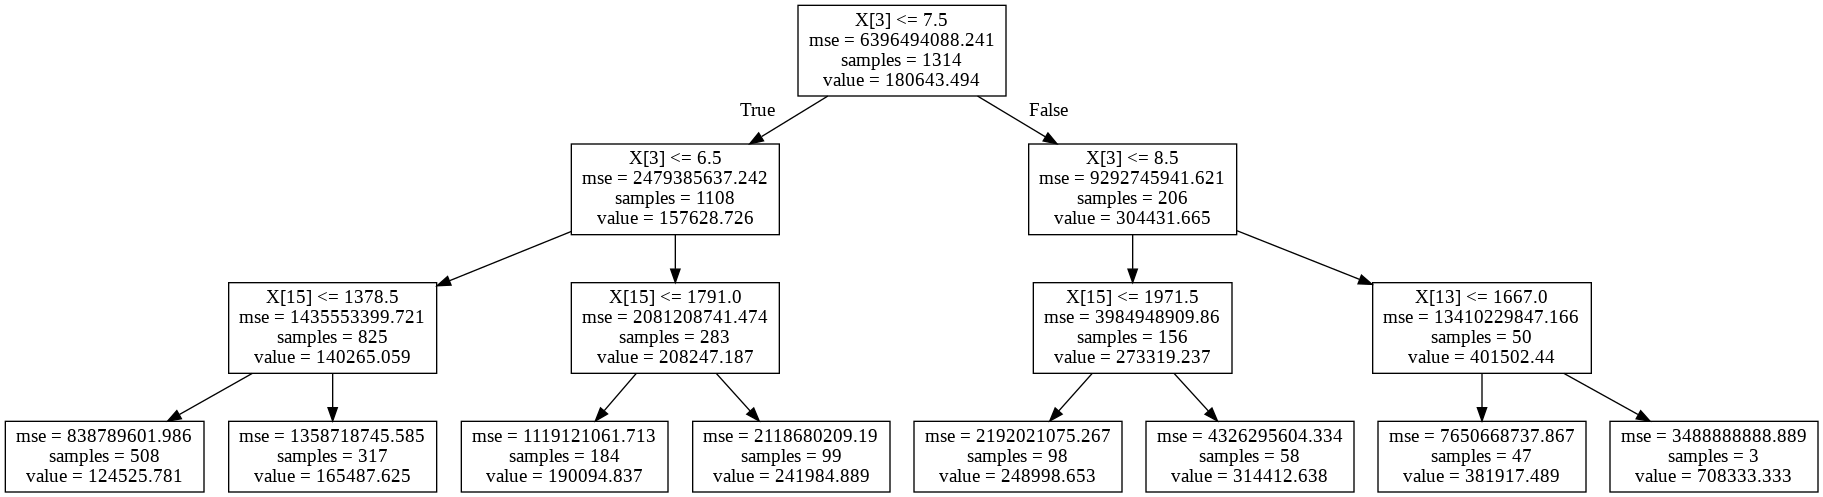

In [28]:
# run Regression Tree with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    regr = DecisionTreeRegressor(max_depth=3)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))


dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [30]:
# Most important attributes
cols = X.columns
print(cols[3])
print(cols[15])
print(cols[13])

OverallQual
GrLivArea
2ndFlrSF
